In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('kidney_disease.csv')

In [10]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [11]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [12]:
df.shape

(400, 26)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [14]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [15]:
df.drop('id', axis=1, inplace=True)

In [16]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [17]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [18]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [19]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [20]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [22]:
df.red_blood_cell_count

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: red_blood_cell_count, Length: 400, dtype: object

In [24]:
df.packed_cell_volume.unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [25]:
df.packed_cell_volume = pd.to_numeric(df.packed_cell_volume, errors='coerce') 

In [26]:
df.packed_cell_volume.dtype

dtype('float64')

In [27]:
df.packed_cell_volume.unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [28]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [29]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')

In [30]:
df.white_blood_cell_count.dtype

dtype('float64')

In [31]:
df.white_blood_cell_count.unique()

array([ 7800.,  6000.,  7500.,  6700.,  7300.,    nan,  6900.,  9600.,
       12100.,  4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,
        6200.,  8300.,  8400., 10300.,  9800.,  9100.,  7900.,  6400.,
        8600., 18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700.,
       14600.,  6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200.,
       12500.,  5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,
        6500., 13600., 10200.,  9000., 14900.,  8200., 15200.,  5000.,
       16300., 12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,
        2200., 12800., 11200., 19100., 12300., 16700.,  2600., 26400.,
        8800.,  7400.,  4900.,  8000., 12000., 15700.,  4100.,  5700.,
       11500.,  5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,
        5100.,  6600.])

In [32]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [33]:
df['red_blood_cell_count'].dtype

dtype('float64')

In [34]:
df['red_blood_cell_count'].unique()

array([5.2, nan, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3,
       3.2, 3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6,
       2.3, 2.9, 2.7, 8. , 3.3, 3. , 2.4, 4.8, 5.4, 6.1, 6.2, 6.3, 5.1,
       5.8, 5.5, 5.3, 6.4, 5.7, 5.9, 6.5])

In [39]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [36]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [37]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [40]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values 

appetite has ['good' 'poor' nan] values 

peda_edema has ['no' 'yes' nan] values 

aanemia has ['no' 'yes' nan] values 

class has ['ckd' 'ckd\t' 'notckd'] values 



In [43]:
df.diabetes_mellitus.replace(to_replace={' yes': 'yes', '\tyes': 'yes', '\tno': 'no' }, inplace=True)


In [44]:
df.diabetes_mellitus.unique()

array(['yes', 'no', nan], dtype=object)

In [47]:
df.coronary_artery_disease.replace(to_replace='\tno', value='no', inplace=True)

In [48]:
df.coronary_artery_disease.unique()

array(['no', 'yes', nan], dtype=object)

In [51]:
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0, 'ckd\t': 1 })

In [52]:
df['class'].unique()

array([1, 0])

In [53]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' nan] values 

coronary_artery_disease has ['no' 'yes' nan] values 

appetite has ['good' 'poor' nan] values 

peda_edema has ['no' 'yes' nan] values 

aanemia has ['no' 'yes' nan] values 

class has [1 0] values 



In [54]:
# Univariate Analysis

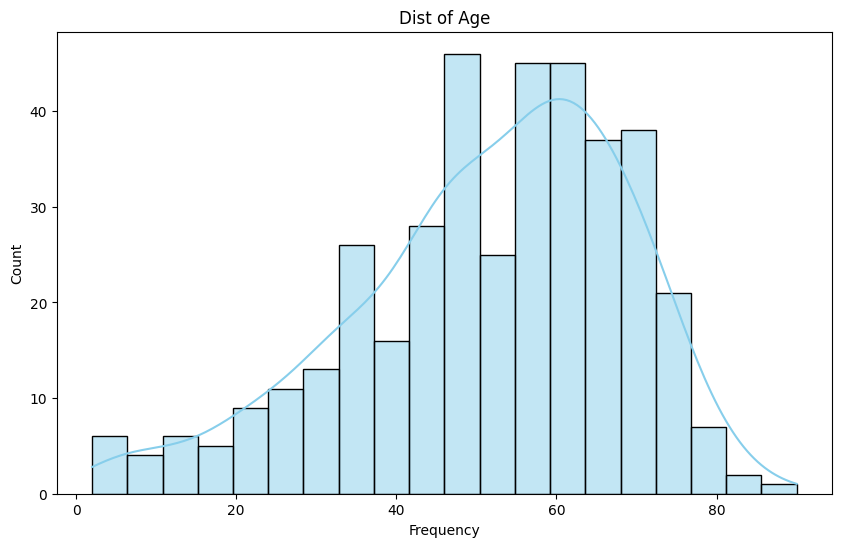

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'].dropna(), kde=True, bins = 20, color='skyblue')
plt.title("Dist of Age")
plt.xlabel("Age")
plt.xlabel("Frequency")
plt.show()

In [58]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='hypertension', ylabel='count'>

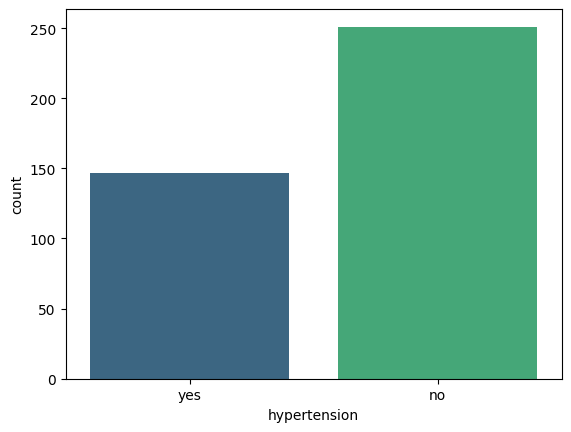

In [59]:
sns.countplot(x = 'hypertension', data=df, palette='viridis')

In [60]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='class', ylabel='blood_urea'>

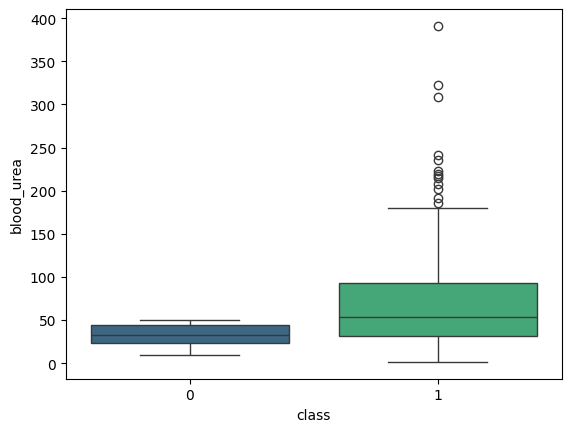

In [61]:
sns.boxplot(x = 'class', y = 'blood_urea', data=df, palette='viridis')

<Axes: xlabel='class', ylabel='serum_creatinine'>

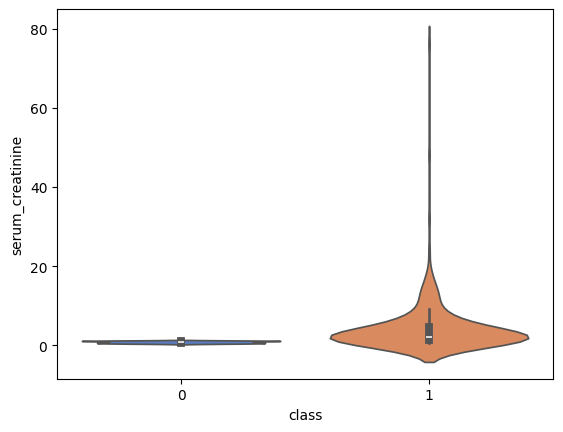

In [62]:
sns.violinplot(x='class', y='serum_creatinine', data=df, palette='muted')

<Axes: xlabel='aanemia', ylabel='count'>

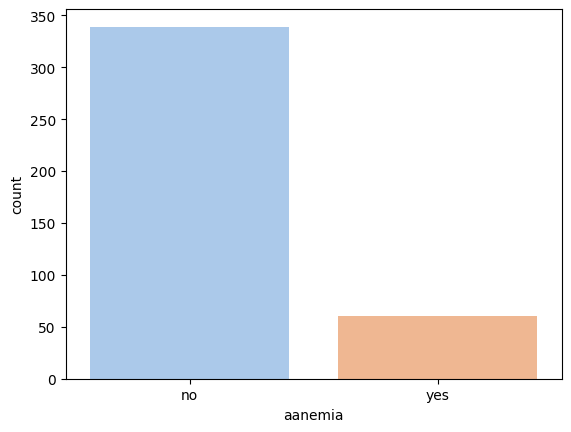

In [63]:
sns.countplot(x = 'aanemia',data=df, palette='pastel')

In [64]:
df.aanemia.unique()

array(['no', 'yes', nan], dtype=object)

In [65]:
df.appetite.unique()

array(['good', 'poor', nan], dtype=object)

<Axes: ylabel='count'>

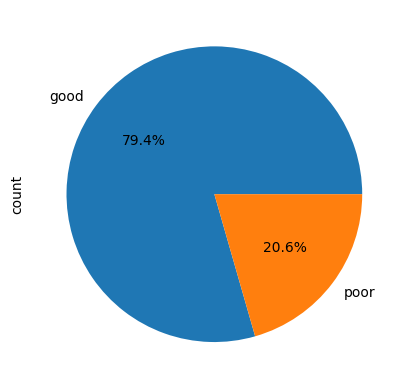

In [67]:
df.appetite.value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='count'>

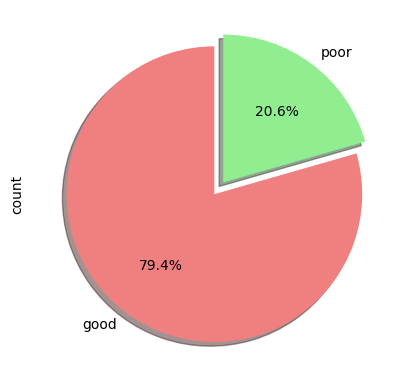

In [72]:
df.appetite.value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], explode=(0, 0.1), startangle=90, shadow=True)

In [73]:
df.pus_cell_clumps.unique()

array(['notpresent', 'present', nan], dtype=object)

<Axes: xlabel='pus_cell_clumps', ylabel='count'>

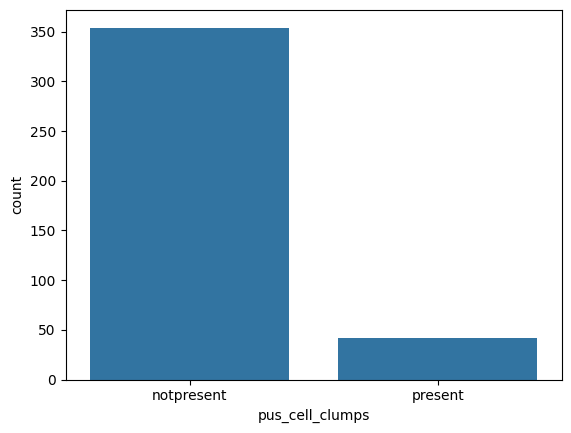

In [74]:
sns.countplot(x='pus_cell_clumps', data=df)

In [75]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='white_blood_cell_count', ylabel='Count'>

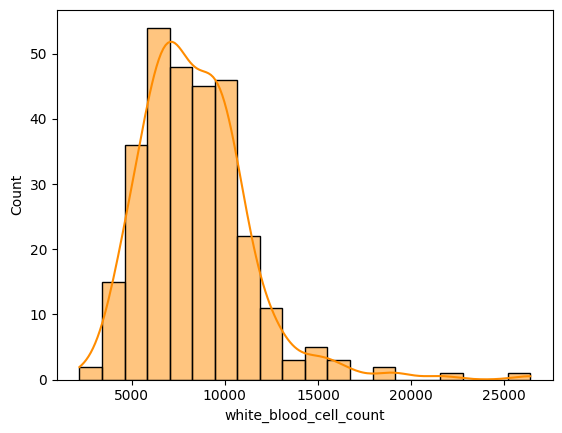

In [79]:
sns.histplot(df.white_blood_cell_count.dropna(), kde=True, bins=20, color='darkorange')

In [83]:
# Donut plot >> Donut chart or ring chart. It is  apie chart with a whole in the center
# by specifying wedgeprops value
# Used to display proportions

<Axes: ylabel='count'>

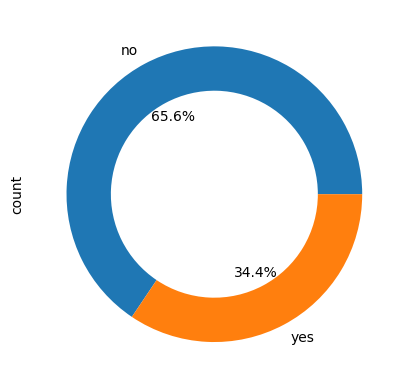

In [85]:
df['diabetes_mellitus'].value_counts().plot.pie(autopct = "%1.1f%%", wedgeprops = dict(width = 0.3))

In [86]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='coronary_artery_disease', ylabel='count'>

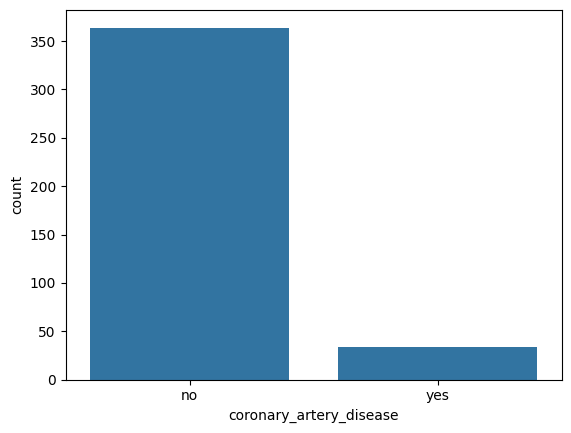

In [87]:
sns.countplot(x = 'coronary_artery_disease', data=df)

In [89]:
df.peda_edema.unique()

array(['no', 'yes', nan], dtype=object)

<Axes: xlabel='peda_edema', ylabel='count'>

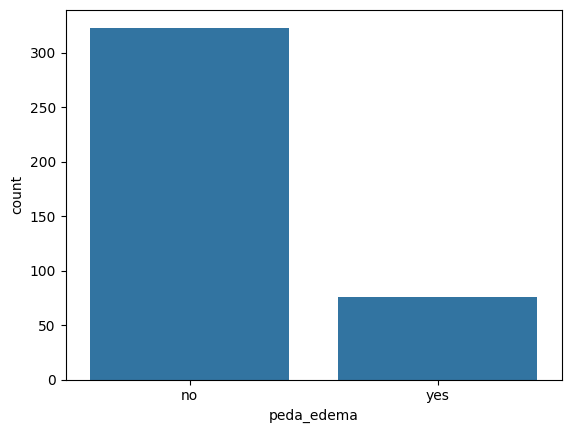

In [90]:
sns.countplot(x = 'peda_edema', data=df)

<Axes: xlabel='bacteria', ylabel='count'>

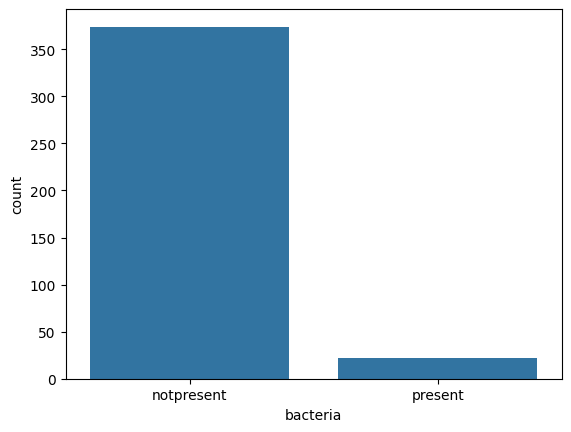

In [91]:
sns.countplot(x = 'bacteria', data=df)

In [92]:
# Bivariate Analysis >> 2 feature at a time

<Axes: xlabel='age', ylabel='blood_pressure'>

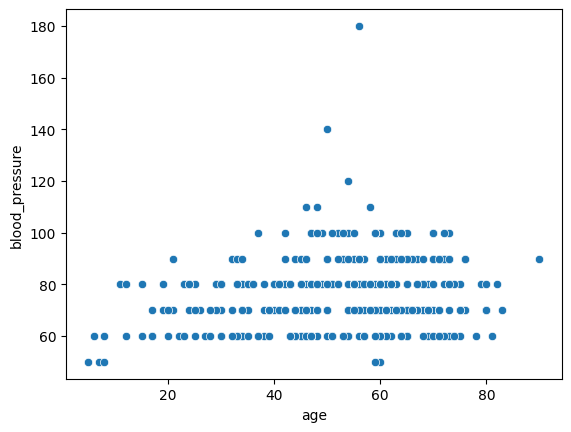

In [93]:
sns.scatterplot(x='age', y='blood_pressure', data=df)

<Axes: xlabel='age', ylabel='blood_pressure'>

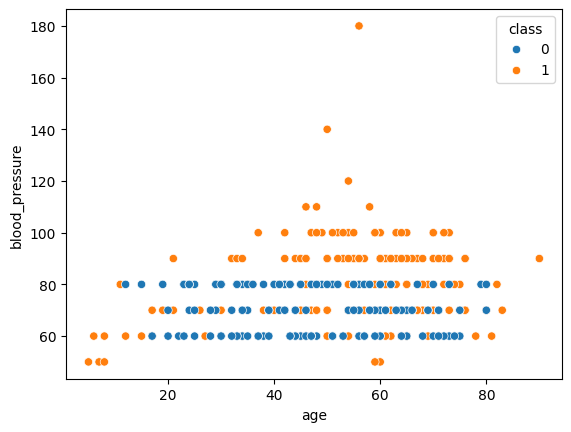

In [94]:
sns.scatterplot(x='age', y='blood_pressure', data=df, hue='class')

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

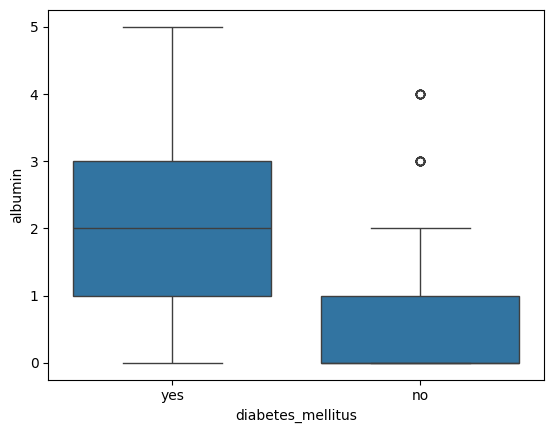

In [95]:
sns.boxplot(x = 'diabetes_mellitus', y = 'albumin', data=df)

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

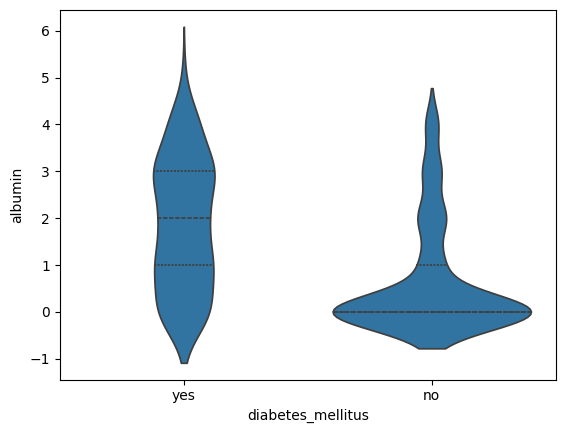

In [97]:
sns.violinplot(x = 'diabetes_mellitus', y = 'albumin', data=df, inner='quartile')

In [98]:
pd.crosstab(df.diabetes_mellitus, df.hypertension)

hypertension,no,yes
diabetes_mellitus,,
no,220,41
yes,31,106


<Axes: xlabel='diabetes_mellitus'>

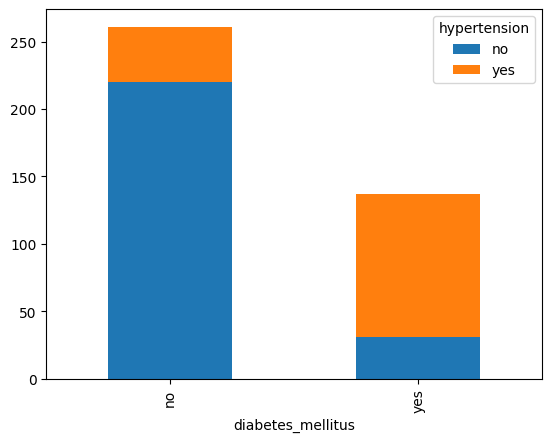

In [99]:
diabetes_hypertension = pd.crosstab(df.diabetes_mellitus, df.hypertension)
diabetes_hypertension.plot(kind='bar', stacked=True)

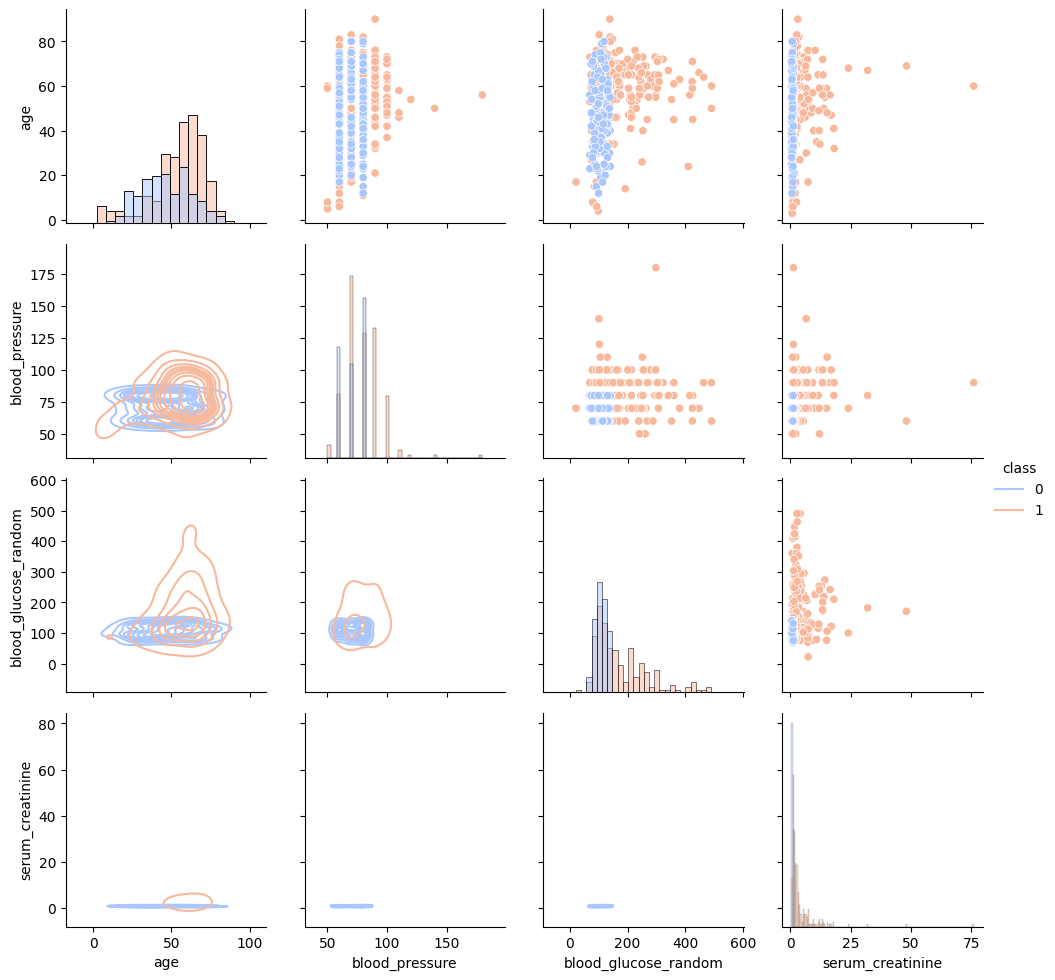

In [105]:
# Multivariate Analysis
cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']
g = sns.PairGrid(df[cols], hue='class', palette='coolwarm')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_diag(sns.histplot)
g.add_legend()
plt.title("")
plt.show()

In [104]:
cols

['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']

<Axes: >

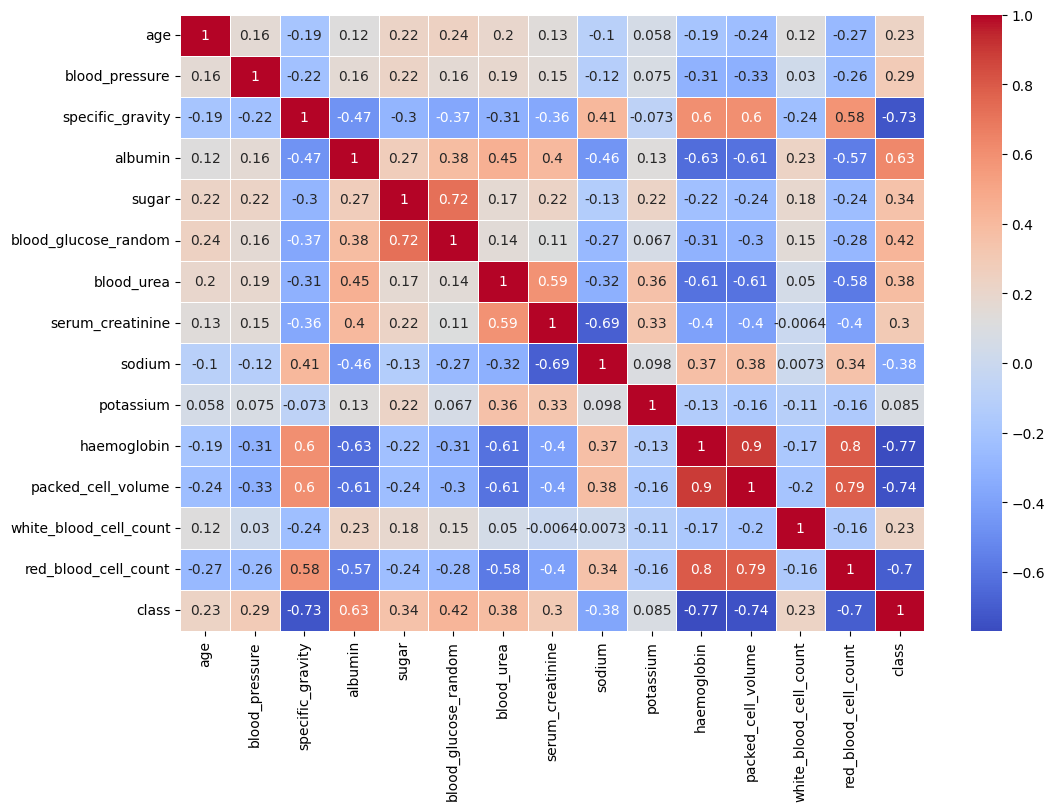

In [107]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

<Axes: xlabel='diabetes_mellitus', ylabel='age'>

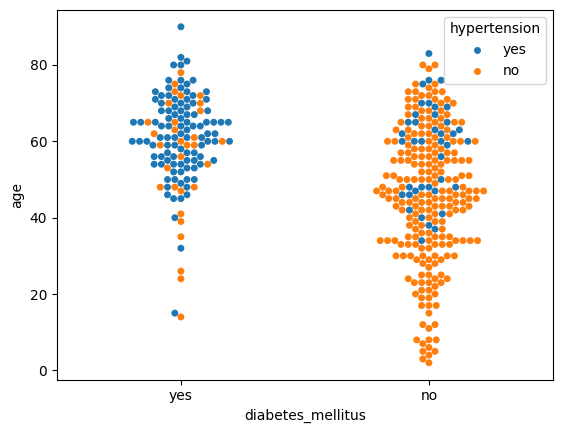

In [112]:
sns.swarmplot(x = 'diabetes_mellitus', y='age', hue='hypertension', data=df)